In [2]:
from fastbook import *
from fastai.vision.all import *

import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, random_split, DataLoader
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid

# Bird Classifier

Trains on Kaggle dataset to classify bird species.

### Dataset

- 275 species
- 40k training images
- 1400 test images
- 1400 valid images
- 224x224 RGB images
- Directory for each species
- Datasets can be split using data.csv
- The training set is **not balanced**
- Most birds are males which are more colourful so won't work well on females

In [3]:
%cd ../data
df = pd.read_csv('birds.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

/home/jack/repos/me/bird_classifier/data


,filepaths,labels,data set
0,train\AFRICAN CROWNED CRANE\001.jpg,AFRICAN CROWNED CRANE,train
1,train\AFRICAN CROWNED CRANE\002.jpg,AFRICAN CROWNED CRANE,train
2,train\AFRICAN CROWNED CRANE\003.jpg,AFRICAN CROWNED CRANE,train
3,train\AFRICAN CROWNED CRANE\004.jpg,AFRICAN CROWNED CRANE,train
4,train\AFRICAN CROWNED CRANE\005.jpg,AFRICAN CROWNED CRANE,train


In [4]:
# fix filepaths for UNIX
df.filepaths = df.filepaths.apply(
    lambda x: x.replace('\\', '/')
)

## 1. Data Exploration & pre-processing

### Choose Only Two Species to Start
Choosing the bald eagel and the bar-tailed godwit as they're relatively distinct.

In [5]:
two_specs = df[
   df['labels'].isin(['BALD EAGLE', 'BAR-TAILED GODWIT'])
]
two_specs.head()

,filepaths,labels,data set
2411,train/BALD EAGLE/001.jpg,BALD EAGLE,train
2412,train/BALD EAGLE/002.jpg,BALD EAGLE,train
2413,train/BALD EAGLE/003.jpg,BALD EAGLE,train
2414,train/BALD EAGLE/004.jpg,BALD EAGLE,train
2415,train/BALD EAGLE/005.jpg,BALD EAGLE,train


In [6]:
bald = two_specs[two_specs.labels == 'BALD EAGLE']
godwit = two_specs[two_specs.labels == 'BAR-TAILED GODWIT']

bald.shape[0], godwit.shape[0]

(170, 124)

In [7]:
bald['data set'].value_counts()

train    160
valid      5
test       5
Name: data set, dtype: int64

In [8]:
godwit['data set'].value_counts()

train    114
test       5
valid      5
Name: data set, dtype: int64

The training data sets has unbalanced classes so removing some will better reflect the accuracy.

### Load Images

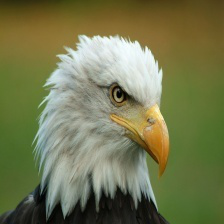

In [9]:
img = PILImage.create('train/BALD EAGLE/001.jpg')
img.to_thumb(224)

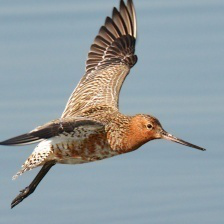

In [10]:
img = PILImage.create('train/BAR-TAILED GODWIT/001.jpg')
img.to_thumb(224)

## 2.Training

In [11]:
TRAIN_DIR = '.'
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
)

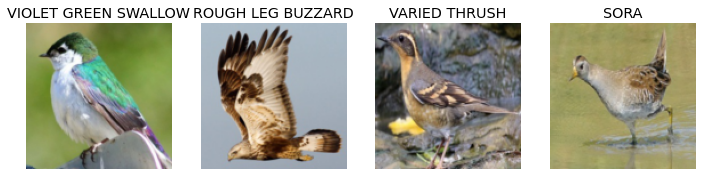

In [12]:
dls = birds.dataloaders(TRAIN_DIR)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

## 3. Save and Test

In [ ]:
# learn.export('birds_full.pkl')

In [ ]:
x = load_learner('../models/birds_full.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# img = PILImage.create('valid/BAR-TAILED GODWIT/5.jpg')
img = PILImage.create('valid/BARN OWL/3.jpg')

x.predict(img)[0]

('BARN OWL',
 tensor(22),
 tensor([2.7912e-13, 4.6765e-14, 1.4232e-10, 8.7572e-13, 1.5742e-09, 1.4935e-14, 3.1906e-12, 4.7099e-12, 2.5002e-08, 5.6130e-15, 8.7515e-10, 7.7121e-14, 1.2913e-11, 5.5986e-13, 1.0009e-12, 9.2693e-13,
         1.1689e-09, 9.6963e-13, 2.4750e-12, 1.3566e-14, 4.3645e-15, 2.2016e-13, 1.0000e+00, 1.8010e-10, 9.5757e-12, 1.7976e-11, 7.6695e-12, 2.1881e-08, 2.7255e-13, 2.9359e-12, 1.1108e-13, 5.8058e-12,
         2.5449e-13, 3.9043e-13, 3.1601e-11, 5.4985e-10, 8.0445e-12, 8.8977e-11, 2.4225e-11, 1.5263e-13, 1.9511e-13, 8.2833e-13, 1.0184e-11, 2.6153e-13, 2.2760e-12, 3.5066e-12, 5.8033e-13, 1.2568e-13,
         1.8078e-12, 8.0890e-10, 8.8501e-13, 1.0993e-11, 1.0998e-11, 1.0624e-13, 3.6693e-09, 2.9375e-12, 9.1930e-11, 3.2733e-13, 2.5873e-15, 5.3476e-12, 1.3455e-12, 1.3618e-13, 5.1615e-11, 6.7356e-11,
         5.6276e-14, 8.6558e-12, 7.1699e-12, 5.8650e-09, 5.3628e-13, 4.7291e-14, 1.3209e-11, 1.3201e-13, 1.5572e-10, 1.9419e-12, 3.8629e-13, 6.6751e-14, 1.1075e-12, 7.635